In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [19]:
#Creación del dataframe
df = pd.read_csv(filepath_or_buffer = "/Users/ninoj/Downloads/comprar_alquilar.csv", sep=',', low_memory=False)
df.head()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1


In [20]:
# Separamos las características y la variable objetivo (comprar)
X = df.drop('comprar', axis=1)
y = df['comprar']

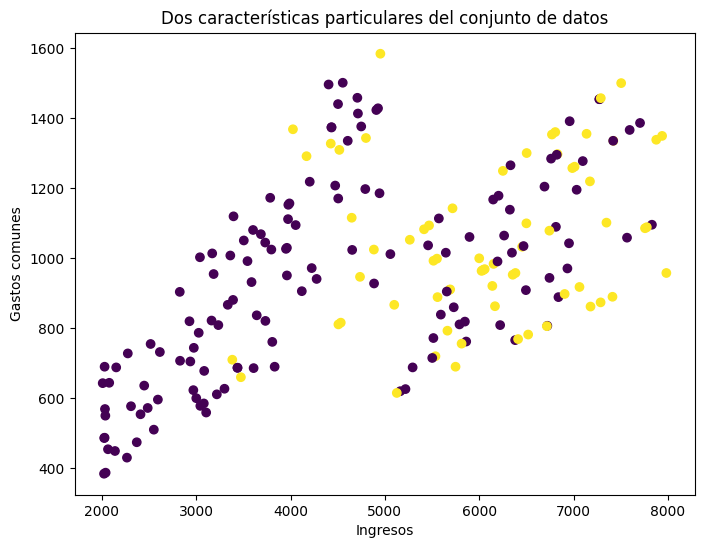

In [21]:
# Mostrar las primeras dos características
plt.figure(figsize=(8,6))
plt.scatter(X['ingresos'], X['gastos_comunes'], c=y)
plt.xlabel('Ingresos')
plt.ylabel('Gastos comunes')
plt.title("Dos características particulares del conjunto de datos")
plt.show()

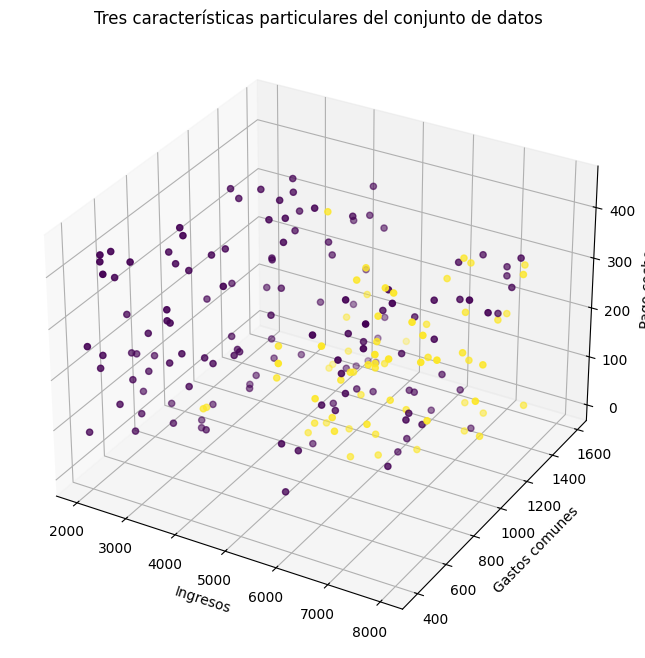

In [22]:
# Mostrar tres características
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X['ingresos'], X['gastos_comunes'], X['pago_coche'], c=y)
ax.set_xlabel('Ingresos')
ax.set_ylabel('Gastos comunes')
ax.set_zlabel('Pago coche')
ax.set_title("Tres características particulares del conjunto de datos")
plt.show()

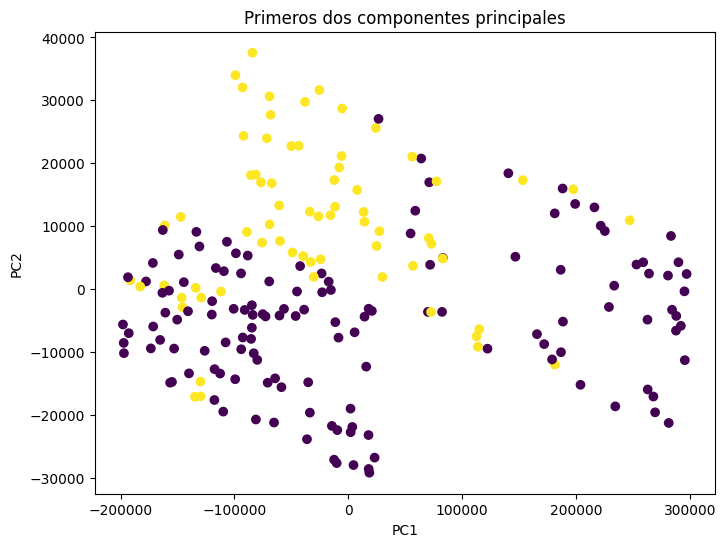

In [23]:
# Mostrar los primeros dos componentes sin escalar
pca = PCA()
plt.figure(figsize=(8,6))
Xt = pca.fit_transform(X)
plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Primeros dos componentes principales")
plt.show()

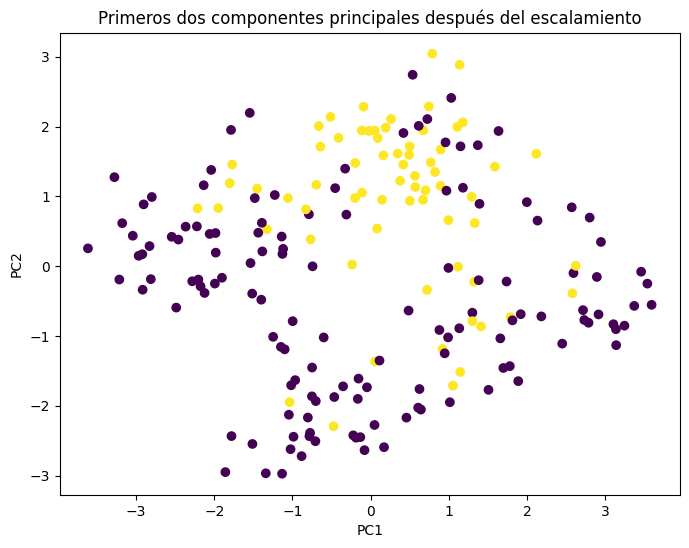

In [24]:
# Mostrar los primeros dos componentes con escalamiento
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
plt.figure(figsize=(8,6))
Xt = pipe.fit_transform(X)
plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Primeros dos componentes principales después del escalamiento")
plt.show()

In [25]:
# Instanciamos PCA y aplicamos reducción de dimensionalidad
pca = PCA(n_components=7)  # Aquí seleccionas el número de componentes que quieres
Xt = pca.fit_transform(X)

In [26]:
# Ver los porcentajes de varianza explicada
expl = pca.explained_variance_ratio_
print("Porcentaje de varianza explicada por componente:", expl)
print('Suma de varianza explicada:', sum(expl))

Porcentaje de varianza explicada por componente: [9.89863622e-01 1.00647971e-02 6.70050846e-05 2.31716041e-06
 1.46719742e-06 7.90766350e-07 3.78445457e-10]
Suma de varianza explicada: 0.9999999999352459


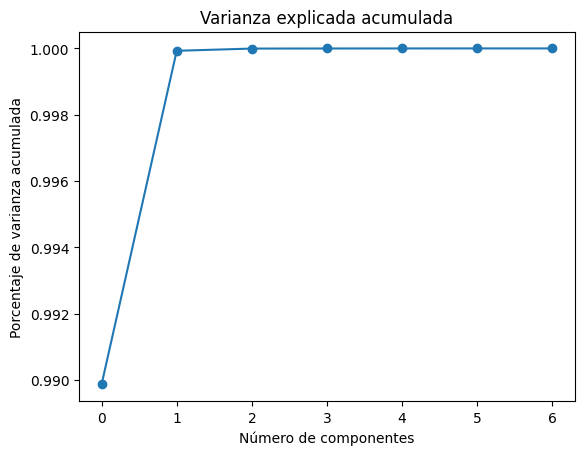

In [27]:
# Graficamos la varianza explicada acumulada
plt.plot(np.cumsum(expl), marker='o')
plt.xlabel('Número de componentes')
plt.ylabel('Porcentaje de varianza acumulada')
plt.title('Varianza explicada acumulada')
plt.show()

In [32]:
# Aplicamos PCA con 7 componentes
pca = PCA(n_components=7)
Xt = pca.fit_transform(X)

# Proyección de las observaciones de entrenamiento
X_pca = pd.DataFrame(
    Xt,
    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']
)

In [30]:
# Mostrar las primeras filas del DataFrame con las observaciones proyectadas
print(X_pca.head())

             PC1           PC2          PC3         PC4         PC5  \
0   27451.171886   9176.509662   349.414674  -50.756462   94.269329   
1  263105.304871 -15992.945140   596.399181 -183.098726  -75.119296   
2  -49947.652129  22731.258427   687.711310  -79.600018  295.340786   
3  287946.215530  -6632.051619   324.377054  176.257329 -231.745918   
4  -24119.301985   4717.231905  1119.279551 -277.212467   11.105082   

          PC6       PC7  
0 -198.720238 -2.454762  
1 -100.394058  3.309737  
2  -88.798926  1.987443  
3 -175.732313 -0.193004  
4    0.608000 -2.795550  


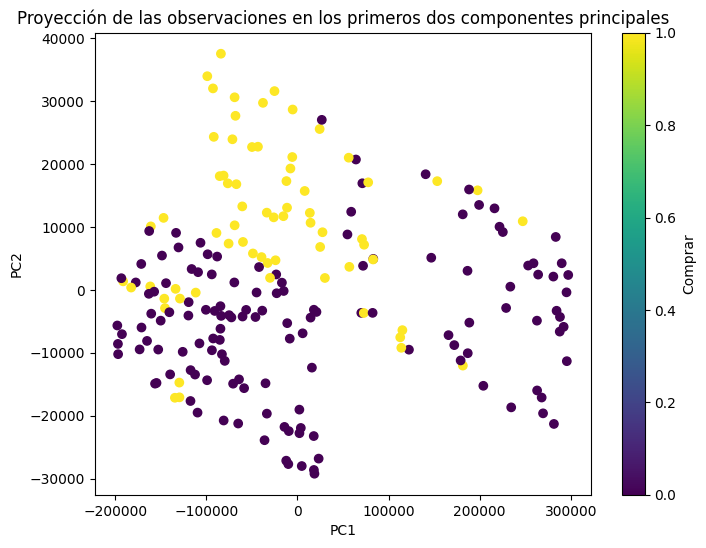

In [33]:
# Agregar la columna 'comprar' de tu dataset original al DataFrame X_pca
X_pca['comprar'] = y  # 'y' es la variable que contiene la columna 'comprar' de tu dataset original

# Graficar las proyecciones en los primeros dos componentes principales (PC1 y PC2)
plt.figure(figsize=(8,6))
plt.scatter(X_pca['PC1'], X_pca['PC2'], c=X_pca['comprar'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Proyección de las observaciones en los primeros dos componentes principales')
plt.colorbar(label='Comprar')  # Para que se vea la leyenda de los valores de 'comprar'
plt.show()

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.98986362 0.99992842 0.99999542 0.99999774 0.99999921 1.
 1.        ]


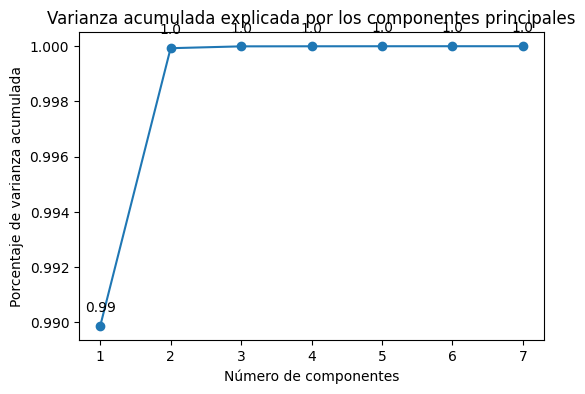

In [34]:
# Graficar la varianza acumulada explicada
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

# Crear gráfico
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(
    np.arange(1, len(prop_varianza_acum) + 1),
    prop_varianza_acum,
    marker='o'
)

# Agregar etiquetas a cada punto
for x, y in zip(np.arange(1, len(prop_varianza_acum) + 1), prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x, y),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center'
    )

# Mostrar el gráfico
plt.xlabel('Número de componentes')
plt.ylabel('Porcentaje de varianza acumulada')
plt.title('Varianza acumulada explicada por los componentes principales')
plt.show()
